Imports

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import glob
import os
from natsort import natsorted
%matplotlib ipympl


To do:
los fourier?

---------------------------------------------------------------------------------------------------------

Rampas R de T (DC) con fechas y Qi desoxigenado

Notas: La caída en Qi corresponde a 0.05mA, a 1mA (lo nuestro) *no hay caída*.

7/11, 8/11, 12/12, 17/12, 18/12

Se observa como la muestra empezó en la fase no estequiométrica y paso a la estequiométrica a lo largo del tratado, caracteizado principalmente por las resitencias a baja temperatura.

(np.float64(-0.5), np.float64(620.5), np.float64(479.5), np.float64(-0.5))

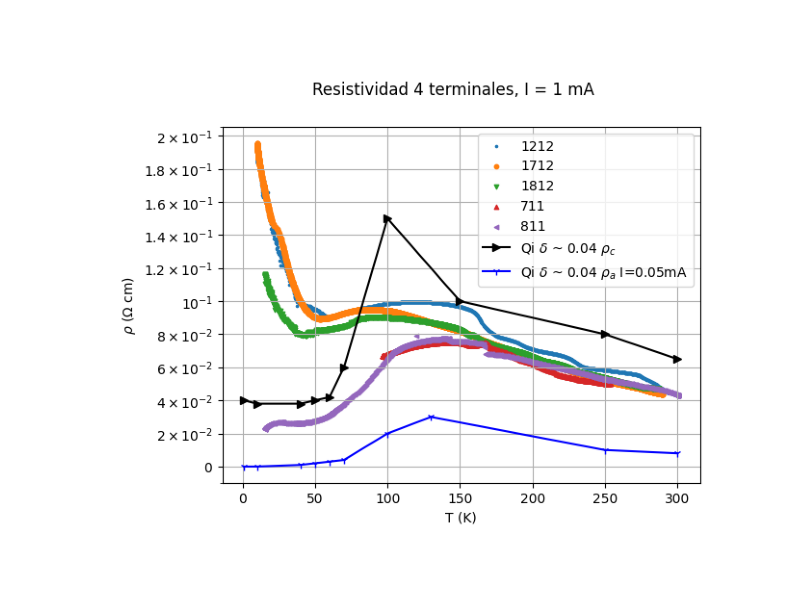

In [2]:
img_left = "e:/porno/tesis 3/tesisfisica/figuras definitivas/Rampas/1ma limpias.png"
plt.figure(figsize=(8, 6))
left_img_data = mpimg.imread(img_left)
im_left = plt.imshow(left_img_data, aspect='equal')
plt.axis('off')


------------------------------------------------------------------------------------------------------------------------------------------

Plots de las rampas de temperatura a 40 Hz y 200kHz

40Hz: Hasta temperaturas de N liquido vemos dos estados: uno asociado a estímulos fuertes en valores de resistencia bajos, el cual es alcanzado gradualmente según la intensidad del estímulo/offset. Para estímulos débiles vemos valores similares a los de una rampa de temperatura DC, indicando que el estado de estímulo fuerte difiere de lo considerado anteriormente. Para temperaturas muy bajas la medición se vuelve altamente ruidosa y no es inmediato ver que ocurre.

200kHz: Hasta ciertas temperaturas la resistencia acompaña lo obtenido para pulsos en corriente continua. En ciertas temperaturas, la fase compleja se extiende mas allá de 90°, invirtiendo la resistencia medida por el LCR. Observando Z y $\Theta$, es un cambio suave.

curvaslcr.py

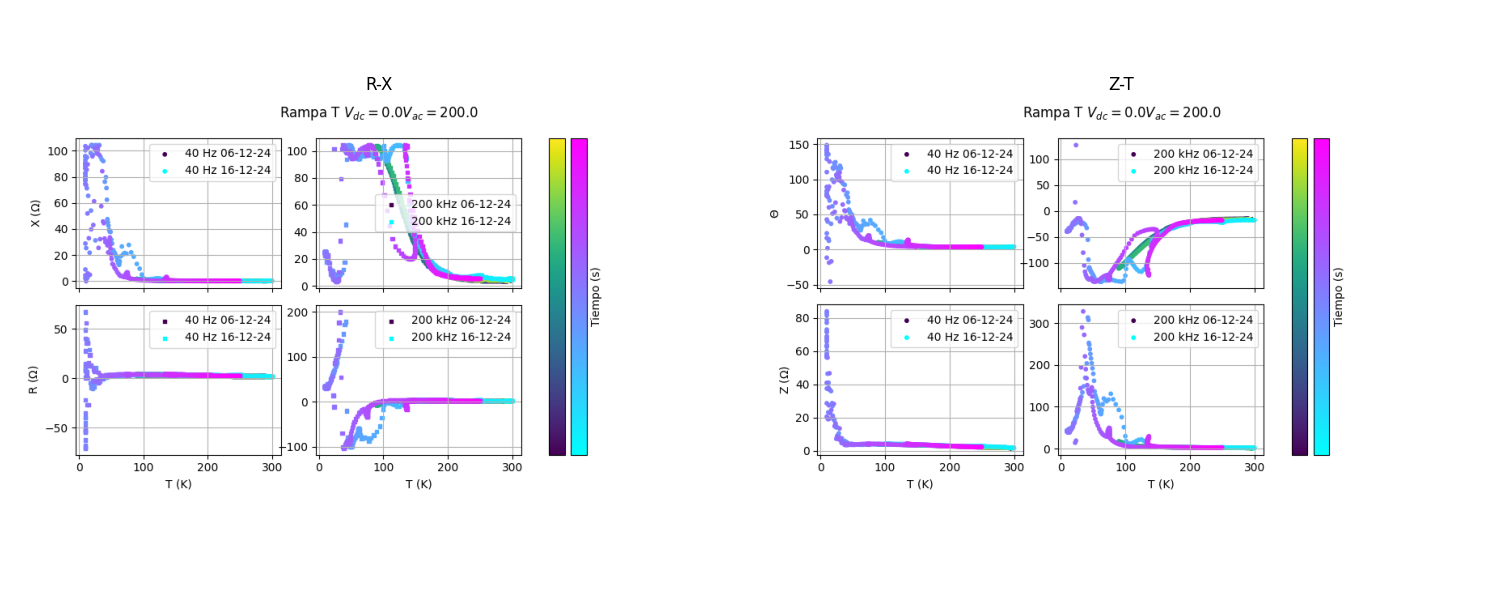

In [3]:
img_left = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/rampaszt/rx/*.png"))
img_rgt = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/rampaszt/zt/*.png"))
slider_left = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_left) - 1,
    step=1,
    description='R-X:',
    continuous_update=False
)
slider_right = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_rgt) - 1,
    step=1,
    description='Z-T:',
    continuous_update=False
)
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(15, 6))
left_img_data = mpimg.imread(img_left[0])
right_img_data = mpimg.imread(img_rgt[0])
im_left = ax_left.imshow(left_img_data, aspect='equal')
im_right = ax_right.imshow(right_img_data, aspect='equal')
ax_left.set_title("R-X")
ax_right.set_title("Z-T")
ax_left.axis('off')
ax_right.axis('off')
#plt.subplots_adjust(wspace=-0.4, hspace=0)
plt.tight_layout()
def update_left(change):
    idx = slider_left.value
    new_img = mpimg.imread(img_left[idx])
    im_left.set_data(new_img)
    ax_left.set_title(f"R-X")
    fig.canvas.draw_idle()
def update_right(change):
    idx = slider_right.value
    new_img = mpimg.imread(img_rgt[idx])
    im_right.set_data(new_img)
    ax_right.set_title(f"Z-T")
    fig.canvas.draw_idle()
slider_left.observe(update_left, names='value')
slider_right.observe(update_right, names='value')
display(widgets.HBox([slider_left, slider_right]))

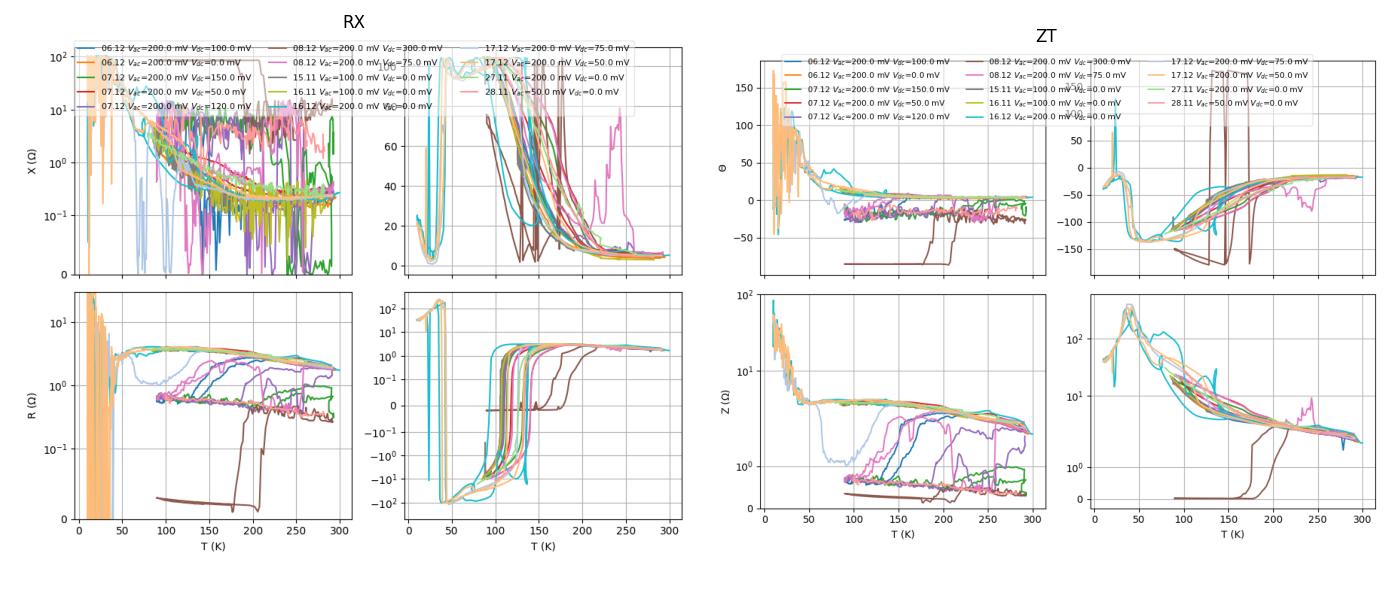

In [4]:
img_left = ("e:/porno/tesis 3/tesisfisica/figuras definitivas/rampaszt/sinf/RampaTenLCRRX.png")
img_rgt = ("e:/porno/tesis 3/tesisfisica/figuras definitivas/rampaszt/sinf/RampaTenLCRZT.png")

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(14, 6))
left_img_data = mpimg.imread(img_left)
right_img_data = mpimg.imread(img_rgt)
im_left = ax_left.imshow(left_img_data, aspect='equal')
im_right = ax_right.imshow(right_img_data, aspect='equal')
ax_left.set_title("RX")
ax_right.set_title("ZT")
ax_left.axis('off')
ax_right.axis('off')
plt.tight_layout()

------------------------------------------------------------------------------------------------------------------------------------------

Mapas de calor Resistencia-Offset-Temperatura $V_{ac}=100$ mV

Se evidencia una modificación en este comportamiento en conjunto con el cambio a fase estequiométrica. Se observa que el comportamiento general se mantiene, no así la naturaleza del cambio de estado resistivo a no resistivo dependiente de los parámetros del estímulo AC (en temperaturas iguales). Esto no se corresponde directamente con simples cambios resistivos, sino que la dependencia es distinta.

20/11, 18/12 plot3d.py

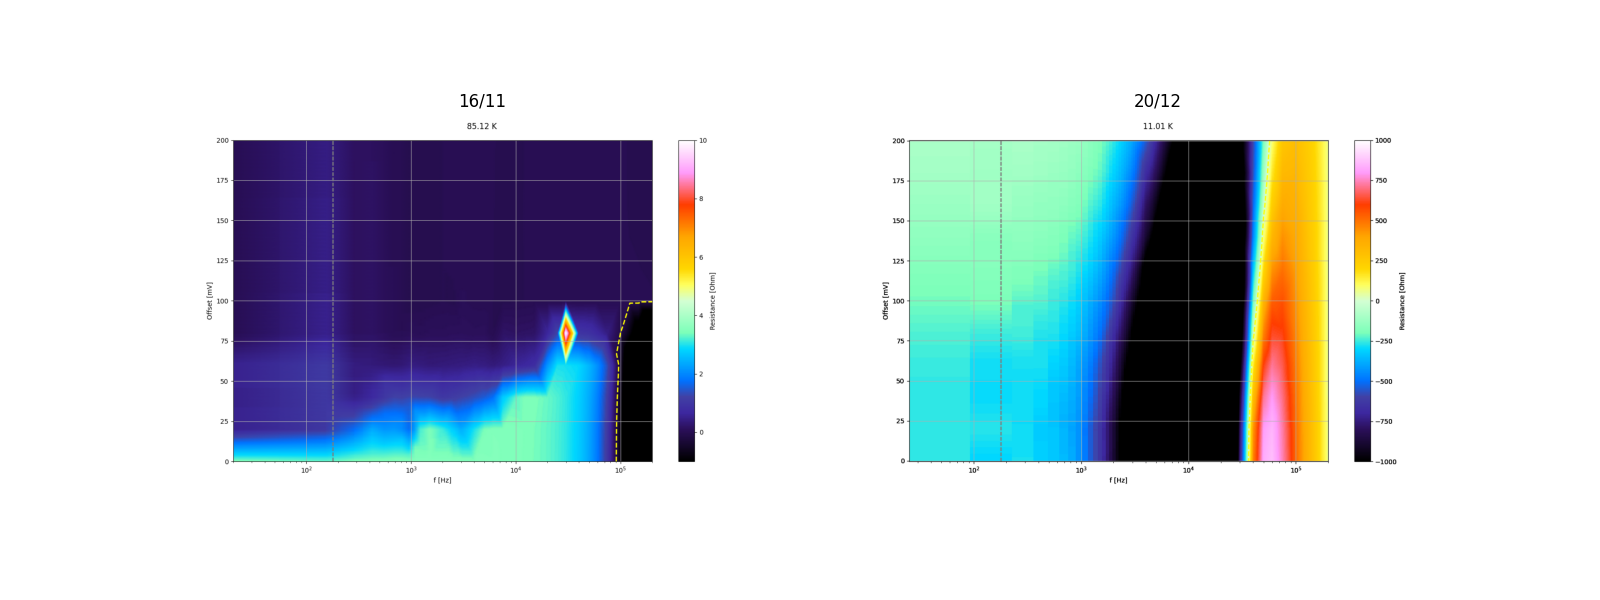

In [5]:
img_left = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/1611/*.png"))
img_rgt = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/1812/*.png"))
slider_left = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_left) - 1,
    step=1,
    description='16/11:',
    continuous_update=False
)
slider_right = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_rgt) - 1,
    step=1,
    description='20/12:',
    continuous_update=False
)
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(16, 6))
left_img_data = mpimg.imread(img_left[0])
right_img_data = mpimg.imread(img_rgt[0])
im_left = ax_left.imshow(left_img_data, aspect='equal')
im_right = ax_right.imshow(right_img_data, aspect='equal')
ax_left.set_title("16/11")
ax_right.set_title("20/12")
ax_left.axis('off')
ax_right.axis('off')
def update_left(change):
    idx = slider_left.value
    new_img = mpimg.imread(img_left[idx])
    im_left.set_data(new_img)
    ax_left.set_title(f"16/11")
    fig.canvas.draw_idle()
def update_right(change):
    idx = slider_right.value
    new_img = mpimg.imread(img_rgt[idx])
    im_right.set_data(new_img)
    ax_right.set_title(f"20/12")
    fig.canvas.draw_idle()
slider_left.observe(update_left, names='value')
slider_right.observe(update_right, names='value')
display(widgets.HBox([slider_left, slider_right]))


------------------------------------------------------------------------------------------------------------------------------------------

$V_{dc}$ variable  Rampas de ZdeW en T

Anomalía en la lectura entre 200 y 240 K. Esto coincide parcialmente con la transición AFM. Cao(2018, p7) señala que $\rho$ no sufre cambios ante esto.

Cambio entre fase estequiométrica y no estequio? para bajas temperaturas?. La temperatura es demasiado alta para esto en principio.

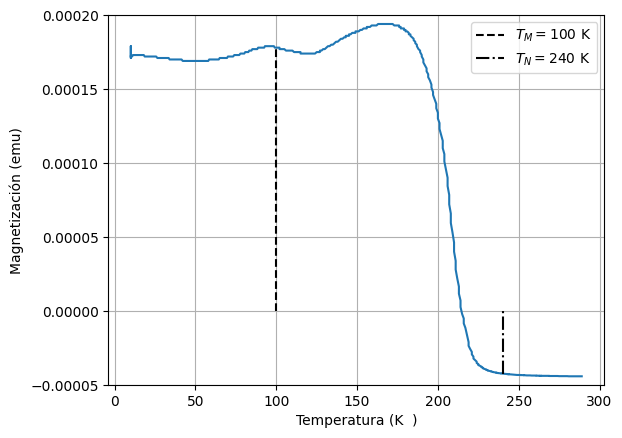
Medición nuestra de X4.

9/12 curvastlcr.py


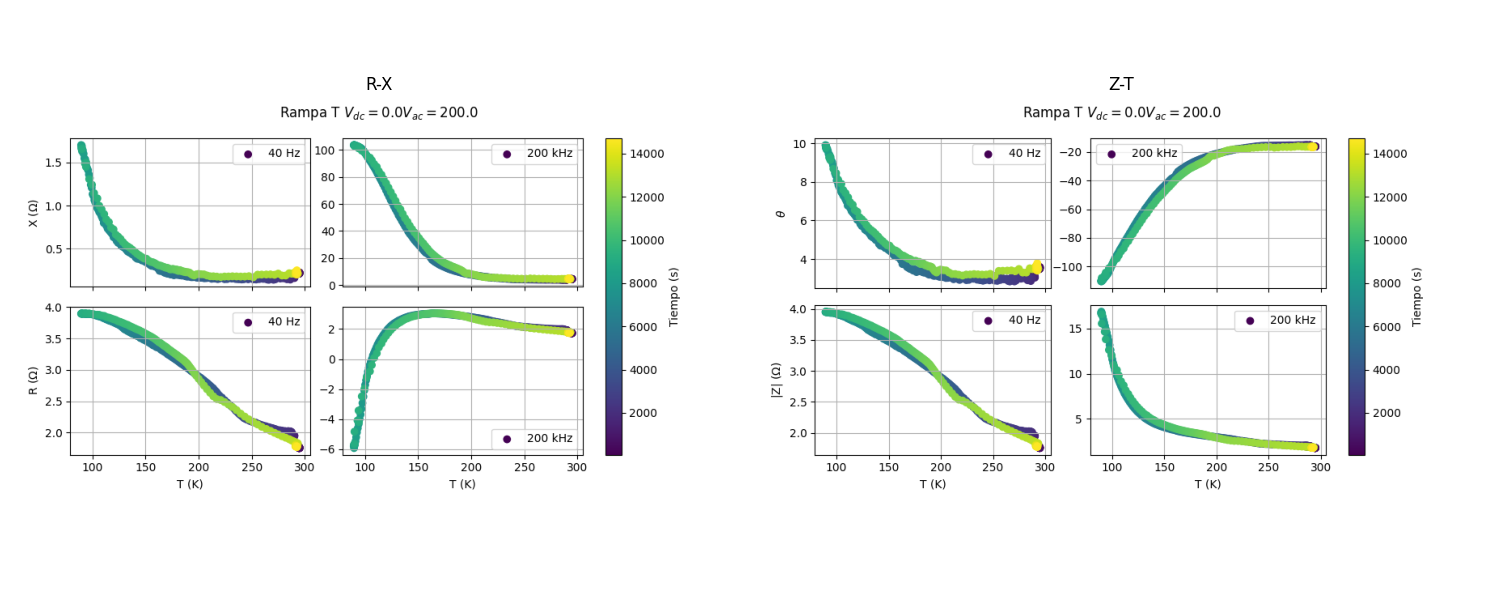

In [6]:
img_left = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/vdcvarent/rx/*.png"))
img_rgt = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/vdcvarent/zt/*.png"))
slider_left = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_left) - 1,
    step=1,
    description='R-X:',
    continuous_update=False
)
slider_right = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_rgt) - 1,
    step=1,
    description='Z-T:',
    continuous_update=False
)
fig, (ax_left, ax_right) = plt.subplots(1,2, figsize=(15, 6))
left_img_data = mpimg.imread(img_left[0])
right_img_data = mpimg.imread(img_rgt[0])
im_left = ax_left.imshow(left_img_data, aspect='equal')
im_right = ax_right.imshow(right_img_data, aspect='equal')
ax_left.set_title("R-X")
ax_right.set_title("Z-T")
ax_left.axis('off')
ax_right.axis('off')
plt.tight_layout()
def update_left(change):
    idx = slider_left.value
    new_img = mpimg.imread(img_left[idx])
    im_left.set_data(new_img)
    ax_left.set_title(f"R-X")
    fig.canvas.draw_idle()
def update_right(change):
    idx = slider_right.value
    new_img = mpimg.imread(img_rgt[idx])
    im_right.set_data(new_img)
    ax_right.set_title(f"Z-T")
    fig.canvas.draw_idle()
slider_left.observe(update_left, names='value')
slider_right.observe(update_right, names='value')
display(widgets.HBox([slider_left, slider_right]))

------------------------------------------------------------------------------------------------------------------------------------------

R2T y R4T vs Offset

Estas mediciones se realizaron con el objetivo de replicar resultados obtenidos con la metodología del LCR utilizando un generador de funciones y análisis de la respuesta eléctrica en un osciloscopio. El objetivo era encontrar un decremento de la resistencia en función del offset. Se observó en las mediciones a cuatro terminales (aunque no es idéntico a lo observado en el LCR), no así en el dos terminales.

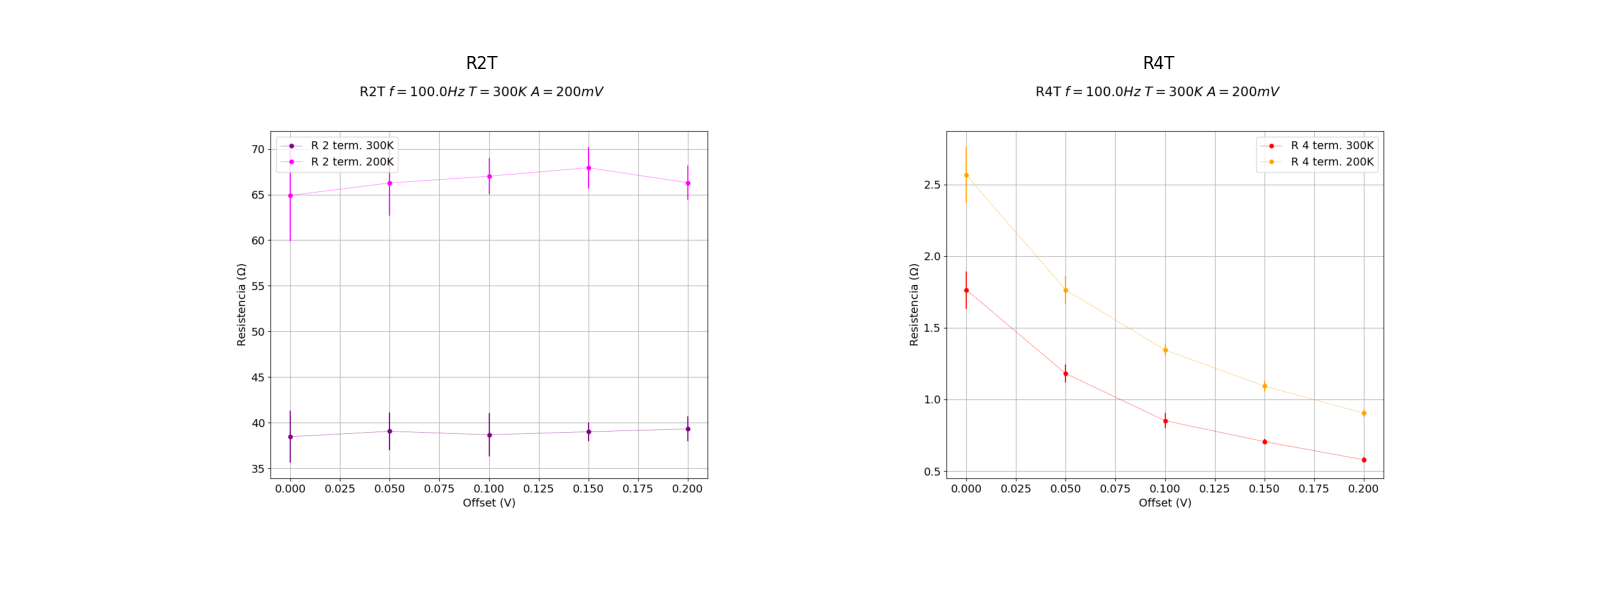

In [8]:
img_left = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/r2t/*.png"))
img_rgt = natsorted(glob.glob("e:/porno/tesis 3/tesisfisica/figuras definitivas/r4t/*.png"))
slider_left = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_left) - 1,
    step=1,
    description='R2T:',
    continuous_update=False
)
slider_right = widgets.IntSlider(
    value=0,
    min=0,
    max=len(img_rgt) - 1,
    step=1,
    description='R4T:',
    continuous_update=False
)
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(16, 6))
left_img_data = mpimg.imread(img_left[0])
right_img_data = mpimg.imread(img_rgt[0])
im_left = ax_left.imshow(left_img_data, aspect='equal')
im_right = ax_right.imshow(right_img_data, aspect='equal')
ax_left.set_title("R2T")
ax_right.set_title("R4T")
ax_left.axis('off')
ax_right.axis('off')
def update_left(change):
    idx = slider_left.value
    new_img = mpimg.imread(img_left[idx])
    im_left.set_data(new_img)
    ax_left.set_title(f"R2T")
    fig.canvas.draw_idle()
def update_right(change):
    idx = slider_right.value
    new_img = mpimg.imread(img_rgt[idx])
    im_right.set_data(new_img)
    ax_right.set_title(f"R4T")
    fig.canvas.draw_idle()
slider_left.observe(update_left, names='value')
slider_right.observe(update_right, names='value')
display(widgets.HBox([slider_left, slider_right]))
